# Modeling

# Imports

In [1]:
import pandas as pd
import numpy as np
import os
import pickle
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import __version__ as sklearn_version
from sklearn.decomposition import PCA
from sklearn.preprocessing import scale
from sklearn.model_selection import train_test_split, cross_validate, GridSearchCV, learning_curve
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn.dummy import DummyRegressor
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error
from sklearn.pipeline import make_pipeline
from sklearn.impute import SimpleImputer
from sklearn.feature_selection import SelectKBest, f_regression
import datetime

# Previous - Preprocessing step

# Load Data

In [2]:
df_merged = pd.read_csv('/Users/swatisharma/Documents/GitHub/Capstone2_Demand_Forecast/df_merged_features.csv')
df_merged.head().T

,0,1,2,3,4
record_ID,1,2,3,4,5
week,2011-01-17,2011-01-17,2011-01-17,2011-01-17,2011-01-17
store_id,8091,8091,8091,8091,8091
sku_id,216418,216419,216425,216233,217390
total_price,99.0375,99.0375,133.95,133.95,141.075
base_price,111.8625,99.0375,133.95,133.95,141.075
is_featured_sku,0,0,0,0,0
is_display_sku,0,0,0,0,0
units_sold,20,28,19,44,52
year,2011,2011,2011,2011,2011


In [3]:
#Drop the column "week"
df_merged = df_merged.drop(['week','is_featured_sku', 'is_display_sku', 'average_price'], axis=1)


In [4]:
df_merged.shape

(150150, 10)

In [5]:
df_merged["month"].unique()

array([ 1,  7,  2,  3,  4, 11,  9,  5,  6,  8, 12, 10])

In [6]:
#Create dummy or indicator features for categorical variable "month"

#categorical data
categorical_cols = ["month", "store_id", "sku_id", "year"] 

#import pandas as pd
result = pd.get_dummies(df_merged, columns = categorical_cols, dtype=int)
result

,record_ID,total_price,base_price,units_sold,day,revenue,month_1,month_2,month_3,month_4,...,sku_id_398721,sku_id_545621,sku_id_546789,sku_id_547934,sku_id_600934,sku_id_673209,sku_id_679023,year_2011,year_2012,year_2013
0,1,99.0375,111.8625,20,17,4380,1,0,0,0,...,0,0,0,0,0,0,0,1,0,0
1,2,99.0375,99.0375,28,17,6132,1,0,0,0,...,0,0,0,0,0,0,0,1,0,0
2,3,133.9500,133.9500,19,17,4161,1,0,0,0,...,0,0,0,0,0,0,0,1,0,0
3,4,133.9500,133.9500,44,17,9636,1,0,0,0,...,0,0,0,0,0,0,0,1,0,0
4,5,141.0750,141.0750,52,17,11388,1,0,0,0,...,0,0,0,0,0,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
150145,212638,235.8375,235.8375,38,7,8322,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
150146,212639,235.8375,235.8375,30,7,6570,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
150147,212642,357.6750,483.7875,31,7,6789,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
150148,212643,141.7875,191.6625,12,7,2628,0,0,0,0,...,0,0,0,1,0,0,0,0,0,1


In [7]:
#Check if there are any nan values
result.isnull().sum(axis = 0)

record_ID        0
total_price      1
base_price       0
units_sold       0
day              0
                ..
sku_id_673209    0
sku_id_679023    0
year_2011        0
year_2012        0
year_2013        0
Length: 125, dtype: int64

In [8]:
null_rows = result.loc[result['total_price'].isnull()]

print(null_rows)

        record_ID  total_price  base_price  units_sold  day  revenue  month_1  \
136949     193915          NaN    469.5375           1   23      219        0   

        month_2  month_3  month_4  ...  sku_id_398721  sku_id_545621  \
136949        0        0        1  ...              0              0   

        sku_id_546789  sku_id_547934  sku_id_600934  sku_id_673209  \
136949              0              0              0              0   

        sku_id_679023  year_2011  year_2012  year_2013  
136949              0          0          0          1  

[1 rows x 125 columns]


In [9]:
#Delete row with dummy value
result = result.dropna(how='any',axis=0)

print(result.head())


   record_ID  total_price  base_price  units_sold  day  revenue  month_1  \
0          1      99.0375    111.8625          20   17     4380        1   
1          2      99.0375     99.0375          28   17     6132        1   
2          3     133.9500    133.9500          19   17     4161        1   
3          4     133.9500    133.9500          44   17     9636        1   
4          5     141.0750    141.0750          52   17    11388        1   

   month_2  month_3  month_4  ...  sku_id_398721  sku_id_545621  \
0        0        0        0  ...              0              0   
1        0        0        0  ...              0              0   
2        0        0        0  ...              0              0   
3        0        0        0  ...              0              0   
4        0        0        0  ...              0              0   

   sku_id_546789  sku_id_547934  sku_id_600934  sku_id_673209  sku_id_679023  \
0              0              0              0              

In [10]:
#Check if there are still nan values
result.isnull().sum(axis = 0)

record_ID        0
total_price      0
base_price       0
units_sold       0
day              0
                ..
sku_id_673209    0
sku_id_679023    0
year_2011        0
year_2012        0
year_2013        0
Length: 125, dtype: int64

# Train/Test Split

Partition sizes with a 70/30 train/test split

In [11]:
len(result) * .7, len(result) * .3

(105104.29999999999, 45044.7)

In [12]:
X_train, X_test, y_train, y_test = train_test_split(result.drop(columns='units_sold'), 
                                                    result.units_sold, test_size=0.3, 
                                                    random_state=47)

In [13]:
X_train.shape, X_test.shape

((105104, 124), (45045, 124))

In [14]:
y_train.shape, y_test.shape

((105104,), (45045,))

In [15]:
#Save the ''record_ID' columns from the train/test data into units_sold_train and units_sold_test
#Then drop those columns from `X_train` and `X_test`. Use 'inplace=True'
column_list = ['record_ID']
column_list_train = X_train[column_list]
column_list_test = X_test[column_list]
X_train.drop(columns=column_list, inplace=True)
X_test.drop(columns=column_list, inplace=True)
X_train.shape, X_test.shape

((105104, 123), (45045, 123))

In [16]:
#Check the `dtypes` attribute of `X_train` to verify all features are numeric
X_train.dtypes

total_price      float64
base_price       float64
day                int64
revenue            int64
month_1            int64
                  ...   
sku_id_673209      int64
sku_id_679023      int64
year_2011          int64
year_2012          int64
year_2013          int64
Length: 123, dtype: object

In [17]:
#Repeat this check for the test split in `X_test`
X_test.dtypes

total_price      float64
base_price       float64
day                int64
revenue            int64
month_1            int64
                  ...   
sku_id_673209      int64
sku_id_679023      int64
year_2011          int64
year_2012          int64
year_2013          int64
Length: 123, dtype: object

We have only numeric features in our X now!

# Initial Not-Even-A-Model

In [18]:
#Calculate the mean of `y_train`
train_mean = y_train.mean()
train_mean

51.70557733292738

sklearn's DummyRegressor does this:

In [19]:
#Fit the dummy regressor on the training data
#Hint, call its `.fit()` method with `X_train` and `y_train` as arguments
#Then print the object's `constant_` attribute and verify it's the same as the mean above
dumb_reg = DummyRegressor(strategy='mean')
dumb_reg.fit(X_train, y_train)
dumb_reg.constant_

array([[51.70557733]])

In [20]:
#Calculate the R^2 as defined above
def r_squared(y, ypred):
    """R-squared score.
    
    Calculate the R-squared, or coefficient of determination, of the input.
    
    Arguments:
    y -- the observed values
    ypred -- the predicted values
    """
    ybar = np.sum(y) / len(y) #yes, we could use np.mean(y)
    sum_sq_tot = np.sum((y - ybar)**2) #total sum of squares error
    sum_sq_res = np.sum((y - ypred)**2) #residual sum of squares error
    R2 = 1.0 - sum_sq_res / sum_sq_tot
    return R2

In [21]:
y_tr_pred = dumb_reg.predict(X_train)
y_tr_pred[:5]

array([51.70557733, 51.70557733, 51.70557733, 51.70557733, 51.70557733])

In [22]:
r_squared(y_train, y_tr_pred)

0.0

In [23]:
y_te_pred = train_mean * np.ones(len(y_test))
r_squared(y_test, y_te_pred)

-3.0974410798467744e-06

# sklearn metrics

sklearn.metrics provides many commonly used metrics, included the ones above.

R-squared

In [24]:
r2_score(y_train, y_tr_pred), r2_score(y_test, y_te_pred)

(0.0, -3.0974410798467744e-06)

Mean absolute error

In [25]:
mean_absolute_error(y_train, y_tr_pred), mean_absolute_error(y_test, y_te_pred)

(35.373134508889166, 35.23044624963676)

Mean squared error

In [26]:
mean_squared_error(y_train, y_tr_pred), mean_squared_error(y_test, y_te_pred)

(3697.8953806759732, 3454.830889700147)

Calculating metrics

In [27]:
# train set - sklearn
# correct order, incorrect order
r2_score(y_train, y_tr_pred), r2_score(y_tr_pred, y_train)

(0.0, -8.138262671692872e+30)

In [28]:
# test set - sklearn
# correct order, incorrect order
r2_score(y_test, y_te_pred), r2_score(y_te_pred, y_test)

(-3.0974410798467744e-06, -6.8429975797115925e+31)

In [29]:
# train set - using our homebrew function
# correct order, incorrect order
r_squared(y_train, y_tr_pred), r_squared(y_tr_pred, y_train)

(0.0, -8.138262671692872e+30)

In [30]:
# test set - using our homebrew function
# correct order, incorrect order
r_squared(y_test, y_te_pred), r_squared(y_te_pred, y_test)

(-3.0974410798467744e-06, -6.8429975797115925e+31)

# Initial Models

In [31]:
# These are the values we'll use to fill in any missing values
#X_defaults_median = X_train.median()
#X_defaults_median

Apply the imputation to both train and test splits

In [32]:
#Call `X_train` and `X_test`'s `fillna()` method, passing `X_defaults_median` as the values to use
#Assign the results to `X_tr` and `X_te`, respectively
#X_tr = X_train.fillna(X_defaults_median)
#X_te = X_test.fillna(X_defaults_median)

# Scale the data

As we have features measured in many different units, with numbers that vary by orders of magnitude, we are starting off by scaling them to put them all on a consistent scale. The StandardScaler scales each feature to zero mean and unit variance.

In [33]:
#Call the StandardScaler`s fit method on `X_tr` to fit the scaler
#then use it's `transform()` method to apply the scaling to both the train and test split
#data (`X_tr` and `X_te`), naming the results `X_tr_scaled` and `X_te_scaled`, respectively
#scaler = StandardScaler()
#scaler.fit(X_tr)
#X_tr_scaled = scaler.transform(X_tr)
#X_te_scaled = scaler.transform(X_te)

Train the model on the train split

In [34]:
#lm = LinearRegression().fit(X_tr_scaled, y_train)

Make predictions using the model on both train and test splits

In [35]:
#Call the `predict()` method of the model (`lm`) on both the (scaled) train and test data
#Assign the predictions to `y_tr_pred` and `y_te_pred`, respectively
#y_tr_pred = lm.predict(X_tr_scaled)
#y_te_pred = lm.predict(X_te_scaled)

Assess model performance

In [36]:
#Calculate r^2 - train, test
#median_r2 = r2_score(y_train, y_tr_pred), r2_score(y_test, y_te_pred)
#median_r2

In [37]:
#Now calculate the mean absolute error scores
# as we did above for R^2
# MAE - train, test
#median_mae = mean_absolute_error(y_train, y_tr_pred), mean_absolute_error(y_test, y_te_pred)
#median_mae

In [38]:
# MSE - train, test
#median_mse = mean_squared_error(y_train, y_tr_pred), mean_squared_error(y_test, y_te_pred)
#median_mse

# Continue to Modeling step

# Pipelines

Define the pipeline

In [39]:
pipe = make_pipeline(
    SimpleImputer(strategy='median'), 
    StandardScaler(), 
    LinearRegression()
)

In [40]:
type(pipe)

sklearn.pipeline.Pipeline

In [41]:
hasattr(pipe, 'fit'), hasattr(pipe, 'predict')

(True, True)

In next step we will perform modeling and build two to three different models and identify the best one.

# Fit the pipeline

In [42]:
#Call the pipe's `fit()` method with `X_train` and `y_train` as arguments
pipe.fit(X_train, y_train)

Pipeline(steps=[('simpleimputer', SimpleImputer(strategy='median')),
                ('standardscaler', StandardScaler()),
                ('linearregression', LinearRegression())])

Make predictions on the train and test sets

In [43]:
y_tr_pred = pipe.predict(X_train)
y_te_pred = pipe.predict(X_test)

Assess performance

In [44]:
r2_score(y_train, y_tr_pred), r2_score(y_test, y_te_pred)

(1.0, 1.0)

And compare with your earlier (non-pipeline) result:

In [45]:
#Calculate r^2 - train, test
median_r2 = r2_score(y_train, y_tr_pred), r2_score(y_test, y_te_pred)
median_r2

(1.0, 1.0)

In [46]:
mean_absolute_error(y_train, y_tr_pred), mean_absolute_error(y_test, y_te_pred)

(6.218925511565708e-14, 6.232608933215482e-14)

Comparing it with our earlier result:

In [47]:
#Now calculate the mean absolute error scores
# as we did above for R^2
# MAE - train, test
median_mae = mean_absolute_error(y_train, y_tr_pred), mean_absolute_error(y_test, y_te_pred)
median_mae

(6.218925511565708e-14, 6.232608933215482e-14)

In [48]:
mean_squared_error(y_train, y_tr_pred), mean_squared_error(y_test, y_te_pred)

(6.3870996834556944e-27, 6.323154278400678e-27)

Compare with your earlier result:

In [49]:
# MSE - train, test
median_mse = mean_squared_error(y_train, y_tr_pred), mean_squared_error(y_test, y_te_pred)
median_mse

(6.3870996834556944e-27, 6.323154278400678e-27)

These results confirm the pipeline is doing exactly what's expected, and results are identical to your earlier steps.

# Refining The Linear Model

# Define the pipeline

Redefine pipeline to include this feature selection step:

In [50]:
#Add `SelectKBest` as a step in the pipeline between `StandardScaler()` and `LinearRegression()`
#Don't forget to tell it to use `f_regression` as its score function
pipe = make_pipeline(
    SimpleImputer(strategy='median'), 
    StandardScaler(),
    SelectKBest(score_func=f_regression, k=5),
    LinearRegression()
)

# Fit the pipeline

In [51]:
pipe.fit(X_train, y_train)

Pipeline(steps=[('simpleimputer', SimpleImputer(strategy='median')),
                ('standardscaler', StandardScaler()),
                ('selectkbest',
                 SelectKBest(k=5,
                             score_func=<function f_regression at 0x12a436700>)),
                ('linearregression', LinearRegression())])

Assess performance on the train and test set

In [52]:
y_tr_pred = pipe.predict(X_train)
y_te_pred = pipe.predict(X_test)

In [53]:
r2_score(y_train, y_tr_pred), r2_score(y_test, y_te_pred)

(0.22249431829015676, 0.22630737296641845)

In [54]:
mean_absolute_error(y_train, y_tr_pred), mean_absolute_error(y_test, y_te_pred)

(30.921001736638107, 30.830047603090346)

# Define a new pipeline to select a different number of features

In [55]:
#Modifying the `SelectKBest` step to use a value of all for k
pipe12 = make_pipeline(
    SimpleImputer(strategy='median'), 
    StandardScaler(),
    SelectKBest(score_func=f_regression, k=5),
    LinearRegression()
)

# Fit the pipeline

In [56]:
pipe12.fit(X_train, y_train)

Pipeline(steps=[('simpleimputer', SimpleImputer(strategy='median')),
                ('standardscaler', StandardScaler()),
                ('selectkbest',
                 SelectKBest(k=5,
                             score_func=<function f_regression at 0x12a436700>)),
                ('linearregression', LinearRegression())])

Assess performance on train and test data

In [57]:
y_tr_pred = pipe12.predict(X_train)
y_te_pred = pipe12.predict(X_test)

In [58]:
r2_score(y_train, y_tr_pred), r2_score(y_test, y_te_pred)

(0.22249431829015676, 0.22630737296641845)

In [59]:
mean_absolute_error(y_train, y_tr_pred), mean_absolute_error(y_test, y_te_pred)

(30.921001736638107, 30.830047603090346)

# Assessing performance using cross-validation

In [60]:
cv_results = cross_validate(pipe12, X_train, y_train, cv=5)

In [61]:
cv_scores = cv_results['test_score']
cv_scores

array([1.        , 0.20746808, 1.        , 0.22909005, 1.        ])

Without using the same random state for initializing the CV folds, your actual numbers will be different.

In [62]:
np.mean(cv_scores), np.std(cv_scores)

(0.687311625471248, 0.38302451659292147)

In [63]:
np.round((np.mean(cv_scores) - 2 * np.std(cv_scores), np.mean(cv_scores) + 2 * np.std(cv_scores)), 2)

array([-0.08,  1.45])

# Hyperparameter search using GridSearchCV

In [64]:
#Call `pipe`'s `get_params()` method to get a dict of available parameters and print their names
#using dict's `keys()` method
pipe.get_params().keys()

dict_keys(['memory', 'steps', 'verbose', 'simpleimputer', 'standardscaler', 'selectkbest', 'linearregression', 'simpleimputer__add_indicator', 'simpleimputer__copy', 'simpleimputer__fill_value', 'simpleimputer__keep_empty_features', 'simpleimputer__missing_values', 'simpleimputer__strategy', 'simpleimputer__verbose', 'standardscaler__copy', 'standardscaler__with_mean', 'standardscaler__with_std', 'selectkbest__k', 'selectkbest__score_func', 'linearregression__copy_X', 'linearregression__fit_intercept', 'linearregression__n_jobs', 'linearregression__positive'])

In [65]:
k = [k+1 for k in range(len(X_train.columns))]
grid_params = {'selectkbest__k': k}

In [66]:
# Select top k features based on correlation with the target (f_regression)
selector = SelectKBest(f_regression, k=5)  # Select top 5 features
X_train_selected = selector.fit_transform(X_train, y_train)

Using a built in function in sklearn, GridSearchCV to find best k.

In [67]:
lr_grid_cv = GridSearchCV(pipe, param_grid=grid_params, cv=3, n_jobs=-1)

In [68]:
lr_grid_cv.fit(X_train, y_train)

GridSearchCV(cv=3,
             estimator=Pipeline(steps=[('simpleimputer',
                                        SimpleImputer(strategy='median')),
                                       ('standardscaler', StandardScaler()),
                                       ('selectkbest',
                                        SelectKBest(k=5,
                                                    score_func=<function f_regression at 0x12a436700>)),
                                       ('linearregression',
                                        LinearRegression())]),
             n_jobs=-1,
             param_grid={'selectkbest__k': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11,
                                            12, 13, 14, 15, 16, 17, 18, 19, 20,
                                            21, 22, 23, 24, 25, 26, 27, 28, 29,
                                            30, ...]})

In [69]:
score_mean = lr_grid_cv.cv_results_['mean_test_score']
score_std = lr_grid_cv.cv_results_['std_test_score']
cv_k = [k for k in lr_grid_cv.cv_results_['param_selectkbest__k']]

In [70]:
#Print the `best_params_` attribute of `lr_grid_cv`
lr_grid_cv.best_params_

{'selectkbest__k': 123}

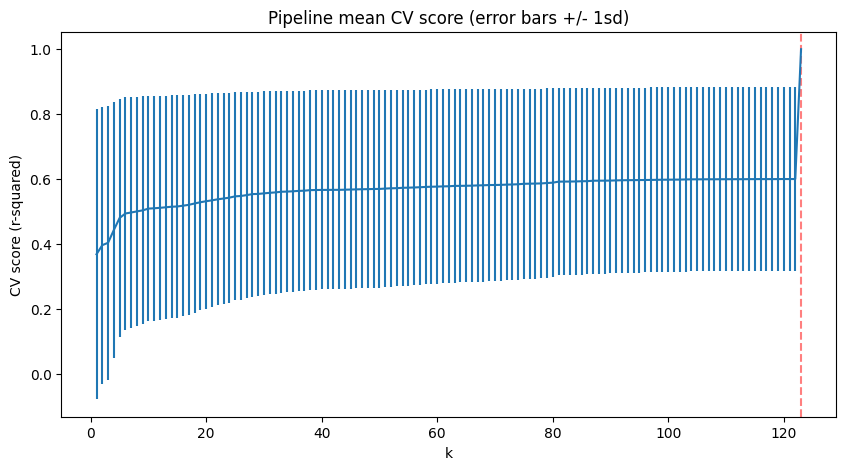

In [71]:
#Assign the value of k from the above dict of `best_params_` and assign it to `best_k`
best_k = lr_grid_cv.best_params_['selectkbest__k']
plt.subplots(figsize=(10, 5))
plt.errorbar(cv_k, score_mean, yerr=score_std)
plt.axvline(x=best_k, c='r', ls='--', alpha=.5)
plt.xlabel('k')
plt.ylabel('CV score (r-squared)')
plt.title('Pipeline mean CV score (error bars +/- 1sd)');

The above suggests a good value for k is 123. There was an initial rapid increase with k, followed by a constant.

In [72]:
selected = lr_grid_cv.best_estimator_.named_steps.selectkbest.get_support()

Similarly, instead of using the 'selectkbest' named step, we can access the named step for the linear regression model and, from that, grab the model coefficients via its coef_ attribute:

In [73]:
#Get the linear model coefficients from the `coef_` attribute and store in `coefs`,
#get the matching feature names from the column names of the dataframe,
#and display the results as a pandas Series with `coefs` as the values and `features` as the index,
#sorting the values in descending order
coefs = lr_grid_cv.best_estimator_.named_steps.linearregression.coef_
features = X_train.columns[selected]
pd.Series(coefs, index= features).sort_values(ascending=False)

revenue          6.081032e+01
total_price      5.417039e-14
day             -8.881784e-15
base_price      -1.776357e-14
store_id_9001   -4.393748e-03
                     ...     
month_2         -8.473326e-01
month_5         -8.766289e-01
year_2013       -2.619065e+00
year_2011       -3.095128e+00
year_2012       -3.115814e+00
Length: 123, dtype: float64

These results suggest that revenue, total_price, day, base_price are our biggest positives.

# Random Forest Model

# Define the pipeline

In [74]:
#Define a pipeline comprising the steps:
#SimpleImputer() with a strategy of 'median'
#StandardScaler(),
#and then RandomForestRegressor() with a random state of 47
RF_pipe = make_pipeline(
    SimpleImputer(strategy="median"),
    StandardScaler(),
    RandomForestRegressor(random_state=47)
)

# Fit and assess performance using cross-validation

In [75]:
#Call `cross_validate` to estimate the pipeline's performance.
#Pass it the random forest pipe object, `X_train` and `y_train`,
#and get it to use 5-fold cross-validation
rf_default_cv_results = cross_validate(RF_pipe, X_train, y_train, cv=5)

In [76]:
rf_cv_scores = rf_default_cv_results['test_score']
rf_cv_scores

array([0.99997937, 0.97994757, 0.99998417, 0.99998666, 0.99570577])

In [77]:
np.mean(rf_cv_scores), np.std(rf_cv_scores)

(0.9951207087691772, 0.0077653563719904915)

# Hyperparameter search using GridSearchCV

Random forest has a number of hyperparameters that can be explored, however we'll limit yourselves to exploring some different values for the number of trees.

In [78]:
#n_est = [int(n) for n in np.logspace(start=1, stop=3, num=20)]
n_est = [10,50,100]
grid_params = {
        'randomforestregressor__n_estimators': n_est,
        'standardscaler': [StandardScaler(), None],
        'simpleimputer__strategy': ['mean', 'median']
}
grid_params

{'randomforestregressor__n_estimators': [10, 50, 100],
 'standardscaler': [StandardScaler(), None],
 'simpleimputer__strategy': ['mean', 'median']}

In [79]:
#Call `GridSearchCV` with the random forest pipeline, passing in the above `grid_params`
#dict for parameters to evaluate, 5-fold cross-validation, and all available CPU cores (if desired)
rf_grid_cv = GridSearchCV(RF_pipe, param_grid=grid_params, cv=3, n_jobs=-1)

In [80]:
#Now call the `GridSearchCV`'s `fit()` method with `X_train` and `y_train` as arguments
#to actually start the grid search. This may take a minute or two.
rf_grid_cv.fit(X_train, y_train)

GridSearchCV(cv=3,
             estimator=Pipeline(steps=[('simpleimputer',
                                        SimpleImputer(strategy='median')),
                                       ('standardscaler', StandardScaler()),
                                       ('randomforestregressor',
                                        RandomForestRegressor(random_state=47))]),
             n_jobs=-1,
             param_grid={'randomforestregressor__n_estimators': [10, 50, 100],
                         'simpleimputer__strategy': ['mean', 'median'],
                         'standardscaler': [StandardScaler(), None]})

In [81]:
#Print the best params (`best_params_` attribute) from the grid search
rf_grid_cv.best_params_

{'randomforestregressor__n_estimators': 10,
 'simpleimputer__strategy': 'mean',
 'standardscaler': StandardScaler()}

It looks like imputing with the median helps, but scaling the features doesn't.

In [82]:
rf_best_cv_results = cross_validate(rf_grid_cv.best_estimator_, X_train, y_train, cv=5)
rf_best_scores = rf_best_cv_results['test_score']
rf_best_scores

array([0.99998087, 0.98187916, 0.99997243, 0.99998496, 0.99574826])

In [83]:
np.mean(rf_best_scores), np.std(rf_best_scores)

(0.9955131365236298, 0.007011187157369323)

We are marginally improved upon the default CV results.

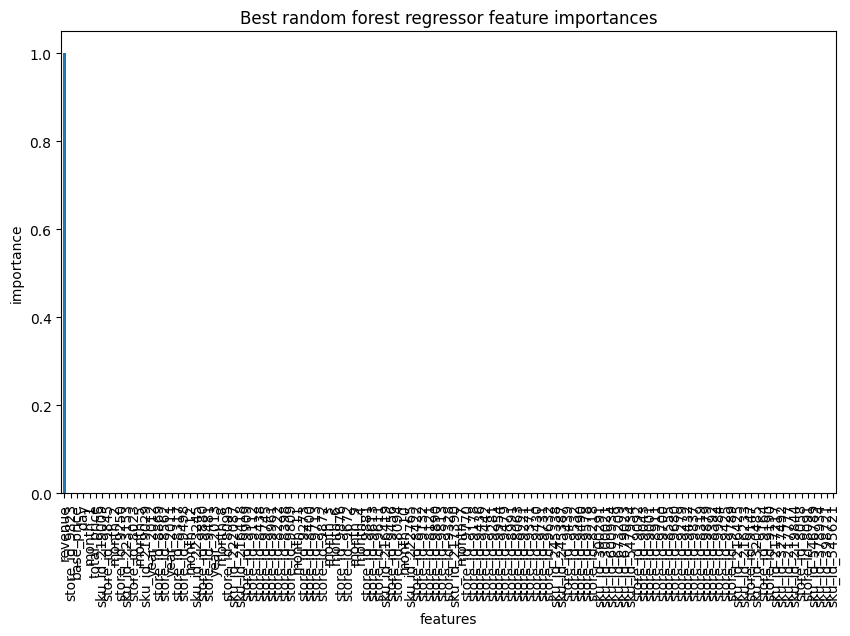

In [84]:
#Plot a barplot of the random forest's feature importances,
#assigning the `feature_importances_` attribute of 
#`rf_grid_cv.best_estimator_.named_steps.randomforestregressor` to the name `imps` to then
#create a pandas Series object of the feature importances, with the index given by the
#training data column names, sorting the values in descending order
plt.subplots(figsize=(10, 6))
imps = rf_grid_cv.best_estimator_.named_steps.randomforestregressor.feature_importances_
rf_feat_imps = pd.Series(imps, index=X_train.columns).sort_values(ascending=False)
rf_feat_imps.plot(kind='bar')
plt.xlabel('features')
plt.ylabel('importance')
plt.title('Best random forest regressor feature importances');

revenue          9.998268e-01
store_id_9823    1.322411e-04
base_price       1.571538e-05
day              7.708939e-06
month_1          3.283666e-06
total_price      3.221331e-06
sku_id_219009    2.937199e-06
store_id_9845    1.802053e-06
month_2          6.967525e-07
store_id_9250    6.785950e-07
dtype: float64


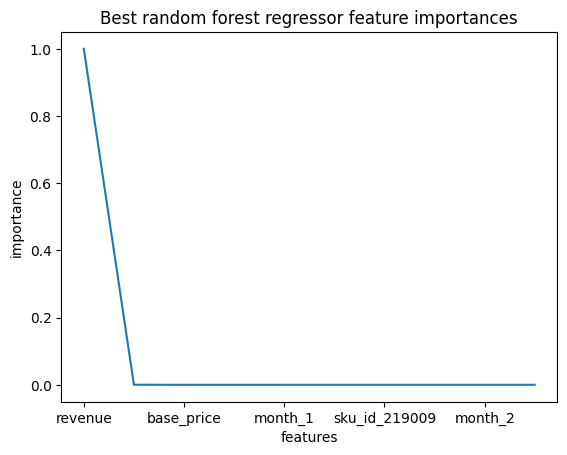

In [85]:
# Get the top N important features (e.g., top 3)
top_n = 10
top_features = rf_feat_imps.head(top_n)

# Print top N features
print(top_features)

top_features.plot(kind='line')
plt.xlabel('features')
plt.ylabel('importance')
plt.title('Best random forest regressor feature importances');

Encouragingly, the dominant top features are revenue, store_id_9823 and base_price. Day, month_1, total_price and sku_id_219009 also are at high bar. And, store_id_219009, month_2, store_id_9250 are also somewhat dominant compared to other's features.





# XG BOOST MODEL

# Initialize the model

In [86]:
import xgboost as xgb
from sklearn.metrics import accuracy_score


# Initialize XGBoost Regressor model
model = xgb.XGBRegressor(objective='reg:squarederror', n_estimators=100, learning_rate=0.1, max_depth=5)

# Fit and assess performance using cross-validation¶

In [87]:
# Train the model
model.fit(X_train, y_train)

# Make predictions
y_pred = model.predict(X_test)

# Calculate RMSE (Root Mean Squared Error)
rmse = mean_squared_error(y_test, y_pred, squared=False)
print(f"RMSE: {rmse:.4f}")

# Step 7: Evaluate Model Performance
mae = mean_absolute_error(y_test, y_pred)
rmse = mean_squared_error(y_test, y_pred, squared=False)
print(f"Mean Absolute Error (MAE): {mae:.2f}")
print(f"Root Mean Squared Error (RMSE): {rmse:.2f}")

RMSE: 10.2188
Mean Absolute Error (MAE): 0.78
Root Mean Squared Error (RMSE): 10.22


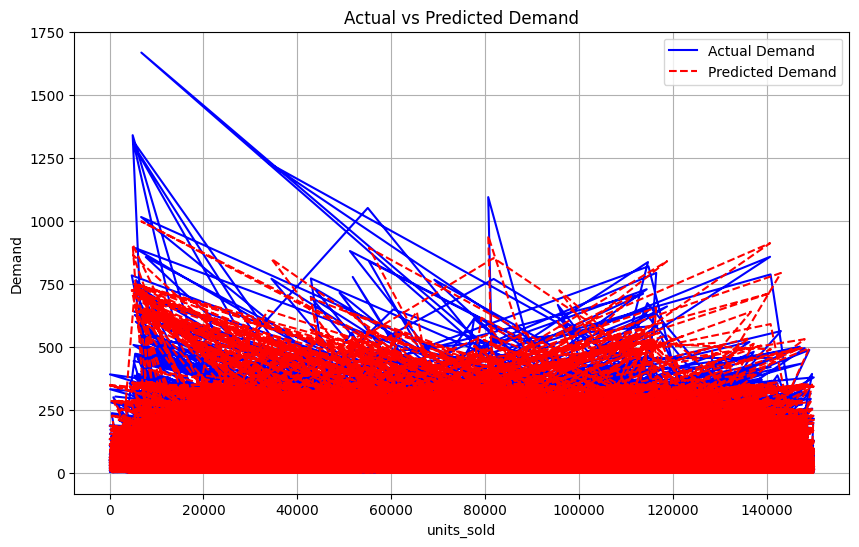

In [88]:
# Step 8: Visualize Actual vs Predicted Demand
plt.figure(figsize=(10, 6))
plt.plot(y_test.index, y_test, label="Actual Demand", color="blue")
plt.plot(y_test.index, y_pred, label="Predicted Demand", color="red", linestyle="--")
plt.title("Actual vs Predicted Demand")
plt.xlabel("units_sold")
plt.ylabel("Demand")
plt.legend()
plt.grid(True)
plt.show()

In [89]:
# make predictions
predictions = model.predict(X_test)

from sklearn.metrics import mean_absolute_error
print("Mean Absolute Error : " + str(mean_absolute_error(predictions, y_test)))

Mean Absolute Error : 0.776311183753825


# Hyperparameter search using GridSearchCV

In [90]:
from sklearn.model_selection import GridSearchCV
from xgboost import XGBRegressor

# Define the parameter grid
param_grid = {
    'n_estimators': [10, 50, 100],
    'max_depth': [3, 6, 9],
    'learning_rate': [0.01, 0.1, 0.2],
    'subsample': [0.8, 0.9, 1.0],
    'colsample_bytree': [0.7, 0.8, 1.0],
    'gamma': [0, 0.1, 0.2]
}

# Create an instance of XGBRegressor
xgb_regressor = XGBRegressor(objective='reg:squarederror')

# Perform grid search with cross-validation
grid_search = GridSearchCV(estimator=xgb_regressor, param_grid=param_grid, 
                           scoring='neg_mean_squared_error', cv=3, verbose=1, n_jobs=-1)

# Fit the grid search
grid_search.fit(X_train, y_train)

# Get the best parameters and best score
print("Best Parameters:", grid_search.best_params_)
print("Best Score (Negative MSE):", grid_search.best_score_)

# Use the best model to predict
best_model = grid_search.best_estimator_
y_pred = best_model.predict(X_test)

Fitting 3 folds for each of 729 candidates, totalling 2187 fits
Best Parameters: {'colsample_bytree': 0.7, 'gamma': 0.2, 'learning_rate': 0.2, 'max_depth': 6, 'n_estimators': 100, 'subsample': 1.0}
Best Score (Negative MSE): -139.31605921762068


# Final Model Selection

# Linear regression model performance

In [91]:
# 'neg_mean_absolute_error' uses the (negative of) the mean absolute error
lr_neg_mae = cross_validate(lr_grid_cv.best_estimator_, X_train, y_train, 
                            scoring='neg_mean_absolute_error', cv=5, n_jobs=-1)

In [92]:
lr_mae_mean = np.mean(-1 * lr_neg_mae['test_score'])
lr_mae_std = np.std(-1 * lr_neg_mae['test_score'])
lr_mae_mean, lr_mae_std

(7.350993259497151e-14, 9.647066438249114e-15)

In [93]:
mean_absolute_error(y_test, lr_grid_cv.best_estimator_.predict(X_test))

6.232608933215482e-14

# Random forest regression model performance

In [94]:
rf_neg_mae = cross_validate(rf_grid_cv.best_estimator_, X_train, y_train, 
                            scoring='neg_mean_absolute_error', cv=5, n_jobs=-1)

In [95]:
rf_mae_mean = np.mean(-1 * rf_neg_mae['test_score'])
rf_mae_std = np.std(-1 * rf_neg_mae['test_score'])
rf_mae_mean, rf_mae_std

(0.03327200319955523, 0.03289233835955569)

In [96]:
mean_absolute_error(y_test, rf_grid_cv.best_estimator_.predict(X_test))

0.008384948384948417

# XG boost model performance

In [108]:
xg_neg_mae = cross_validate(grid_search.best_estimator_, X_train, y_train, 
                            scoring='neg_mean_absolute_error', cv=5, n_jobs=-1)

In [109]:
xg_mae_mean = np.mean(-1 * xg_neg_mae['test_score'])
xg_mae_std = np.std(-1 * xg_neg_mae['test_score'])
xg_mae_mean, xg_mae_std

(1.434247798129434, 0.08037870762775345)

In [110]:
mean_absolute_error(y_test, grid_search.best_estimator_.predict(X_test))

1.349836085956407

# Conclusion

The random forest model has a lower cross-validation mean absolute error with a difference of almost 18. It also exhibits less variability.

# Data quantity assessment

In [100]:
fractions = [.2, .25, .3, .35, .4, .45, .5, .6, .75, .8, 1.0]
train_size, train_scores, test_scores = learning_curve(pipe, X_train, y_train, train_sizes=fractions)
train_scores_mean = np.mean(train_scores, axis=1)
train_scores_std = np.std(train_scores, axis=1)
test_scores_mean = np.mean(test_scores, axis=1)
test_scores_std = np.std(test_scores, axis=1)

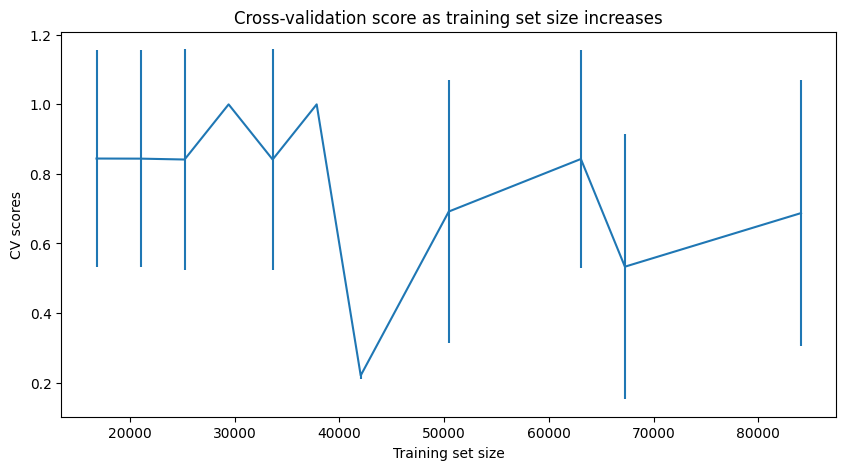

In [101]:
plt.subplots(figsize=(10, 5))
plt.errorbar(train_size, test_scores_mean, yerr=test_scores_std)
plt.xlabel('Training set size')
plt.ylabel('CV scores')
plt.title('Cross-validation score as training set size increases');

Per model scores, the model performance varied. Starting quite leveled off, saw increase in model performance, then reduced and then showed an increase later.

# Save best model object from pipeline

In [102]:
#Save the best model 

best_model = rf_grid_cv.best_estimator_
best_model.version = "1.0"
best_model.pandas_version = pd.__version__
best_model.numpy_version = np.__version__
best_model.sklearn_version = sklearn_version
best_model.X_columns = [col for col in X_train.columns]
best_model.build_datetime = datetime.datetime.now()

In [103]:
# save the model
import pickle

# save the best model as a pickle file
model_pkl_file = "best_model.pkl"  

with open(model_pkl_file, 'wb') as file:
    pickle.dump(best_model, file)

# Feature Importance

Features that came dominant in the modeling (random forest model) included:

- [ ] revenue          
- [ ] store_id_9823    
- [ ] base_price       
- [ ] day              
- [ ] month_1          
- [ ] total_price      
- [ ] sku_id_219009    
- [ ] store_id_9845    
- [ ] month_2          
- [ ] store_id_9250   

# Forecast

In [104]:
import joblib

In [105]:
# Save the model pipeline
joblib.dump(best_model, 'random_forest_model_pipeline.pkl')

# Load the model pipeline
loaded_pipeline = joblib.load('random_forest_model_pipeline.pkl')

# Make predictions with the loaded model
y_pred = loaded_pipeline.predict(X_test)

# Print predictions
print(y_pred)

[24. 30. 68. ...  4. 15. 21.]


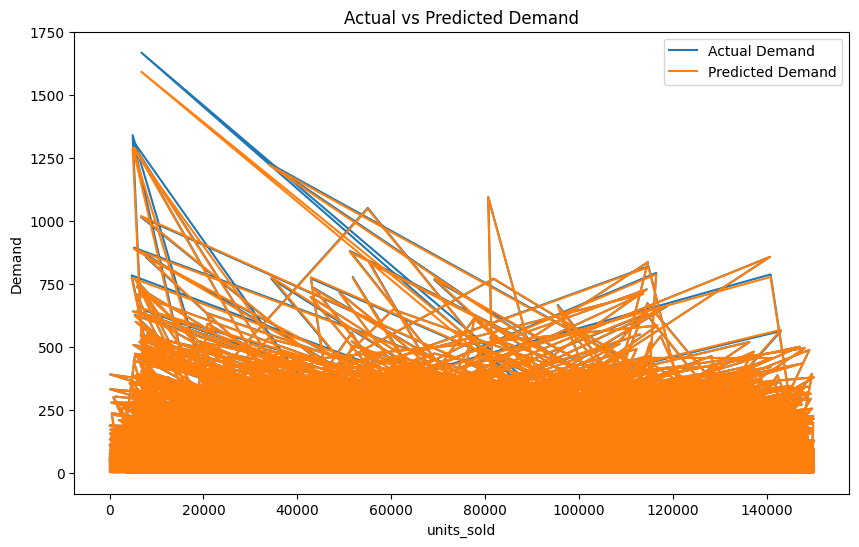

In [106]:
# Plotting the actual vs predicted values
plt.figure(figsize=(10, 6))
plt.plot(y_test.index, y_test, label='Actual Demand')
plt.plot(y_test.index, y_pred, label='Predicted Demand')
plt.xlabel('units_sold')
plt.ylabel('Demand')
plt.title('Actual vs Predicted Demand')
plt.legend()
plt.show()

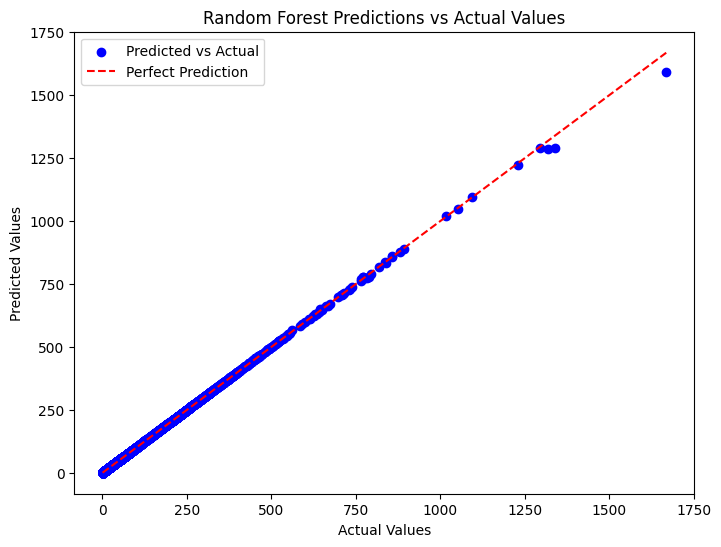

In [107]:
# Create a scatter plot
plt.figure(figsize=(8, 6))

# Plot the actual vs predicted values
plt.scatter(y_test, y_pred, color='blue', label='Predicted vs Actual')

# Optionally, plot a line of perfect prediction (y=x) for better visual comparison
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], color='red', linestyle='--', label='Perfect Prediction')

# Adding titles and labels
plt.title('Random Forest Predictions vs Actual Values')
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')
plt.legend()

# Show the plot
plt.show()